In [68]:
import pandas as pd
import numpy as np
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

In [34]:
data = pd.read_csv("life_expectancy_clean.csv")

data.dropna(subset=['Life expectancy '],inplace=True)


In [35]:
X = data.drop('Life expectancy ',axis=1)
y = data['Life expectancy ']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [37]:
X_test

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1380,Kiribati,2013,Developing,22.0,0,0.01,137.259194,95.0,0,76.7,...,91.0,1.15,95.0,0.1,1724.361737,18535.0,0.1,0.1,0.589,11.9
202,Bangladesh,2005,Developing,155.0,174,0.01,38.054620,45.0,25934,12.5,...,94.0,2.68,93.0,0.1,484.155471,14343111.0,19.9,2.5,0.499,8.2
2777,United Kingdom of Great Britain and Northern I...,2000,Developed,89.0,4,10.59,0.000000,NaN,104,57.5,...,91.0,6.94,91.0,0.1,NaN,NaN,0.7,0.5,NaN,NaN
1883,Niger,2009,Developing,263.0,51,0.11,5.665405,71.0,801,16.9,...,71.0,6.98,71.0,1.1,341.289462,15813913.0,11.0,1.8,0.307,4.2
2213,Samoa,2002,Developing,174.0,0,3.30,208.168844,86.0,0,67.4,...,85.0,5.10,86.0,0.1,1631.417270,176582.0,0.2,0.2,0.653,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Tunisia,2012,Developing,13.0,3,1.30,585.877676,97.0,48,58.3,...,97.0,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,14.6
476,Cambodia,2003,Developing,268.0,21,1.44,55.595439,NaN,653,13.1,...,69.0,6.74,69.0,1.9,362.421379,12853124.0,11.6,11.7,0.445,9.3
495,Cameroon,2000,Developing,394.0,62,3.91,4.720594,NaN,14629,2.9,...,57.0,4.48,62.0,7.7,68.414399,15274234.0,7.7,7.8,0.433,6.9
1515,Libya,2006,Developing,134.0,2,0.01,493.415341,98.0,1,56.7,...,98.0,2.51,98.0,0.1,9344.987518,NaN,5.5,5.4,0.752,15.4


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio                    

In [39]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [40]:
# for col in data.columns:
#     if pd.api.types.is_numeric_dtype(data[col]):
#         data[[col]].hist()
#         plt.title(f'Histogram for {col}')
#         plt.show()
#     else:
#         print(f"Skipping '{col}' as it contains non-numeric data.")

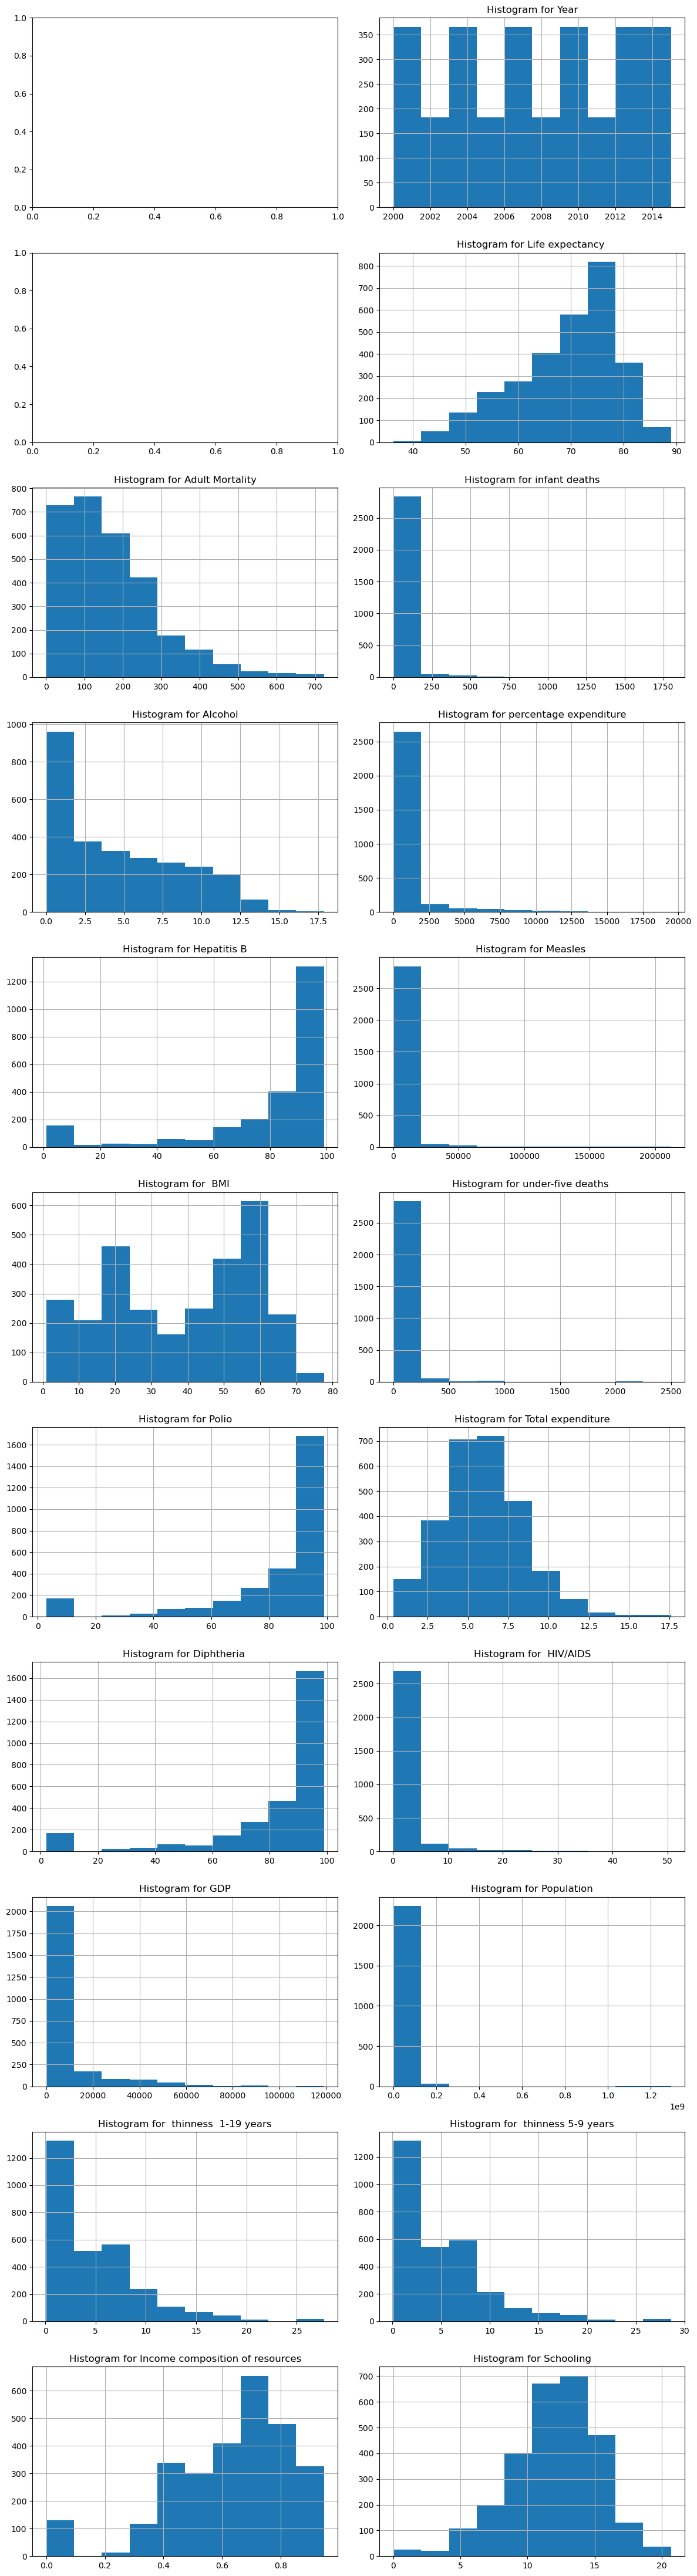

In [41]:
# Assuming 'data' is your DataFrame
num_cols = len(data.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 4))  # Adjust figsize as needed

for i, col in enumerate(data.columns):
    row_index = i // 2
    col_index = i % 2

    if pd.api.types.is_numeric_dtype(data[col]):
        data[[col]].hist(ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Histogram for {col}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [42]:

# params = { 'max_depth': [3, 5, 6, 10, 15, 20],
#            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'subsample': np.arange(0.5, 1.0, 0.1),
#            'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#            'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#            'n_estimators': [100, 500, 1000]}
# xgbr = xgb.XGBRegressor(seed = 20)
# clf = RandomizedSearchCV(estimator=xgbr,
#                          param_distributions=params,
#                          scoring='neg_mean_squared_error',
#                          n_iter=25,
#                          verbose=1)
# clf.fit(X, y)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [43]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from functools import partial
import optuna
from sklearn.compose import ColumnTransformer





In [45]:
xgb.XGBRegressor


xgboost.sklearn.XGBRegressor

In [46]:
# categorical_features = ["County","Status"]
# 
# numeric_features = [i for i in X_train.columns if i not in categorical_features]
# 
# 
# xgb = XGBRegressor()
# 
# # Оберните модель XGBoost в функцию, используя functools.partial
# xgb_model = partial(XGBRegressor)
# xgb_model.__name__ = 'XGBRegressor'
# 
# pipe_num = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('power_tr', PowerTransformer()),
#     ('scaler', StandardScaler()),]) # scaler требует power tr ДО стандартизации
# 
# pipe = Pipeline([
#     ('pipe_num', pipe_num),
#     ('model',xgb_model) # регрессии не используются в реальности, используются бустинги
# ])
# 
# param_grid = {
#     'model__reg_alpha': [1e-5, 1e-2, 0.1, 1, 100],
#     'model__reg_lambda': [1e-5, 1e-2, 0.1, 1, 100], 
#     'pipe_num__imputer__strategy': ['median','mean'],# здесь перезаписывается то что указано в Pipeline выше
#     'pipe_num__scaler':[StandardScaler(),RobustScaler()]# здесь перезаписывается то что указано в Pipeline выше
# }
# 
# model_trained = GridSearchCV(pipe,param_grid, cv=2,scoring=mean_squared_error,verbose=3).fit(X_train,y_train)

In [47]:
X_train['Status'
]

372     Developing
279     Developing
2114    Developing
2819    Developing
1548     Developed
           ...    
2254    Developing
89      Developing
2727    Developing
1723    Developing
2522     Developed
Name: Status, Length: 2049, dtype: object

In [53]:
categorical_features = ["Country","Status"]

numeric_features = [i for i in X_train.columns if i not in categorical_features]

# Пайплайн для числовых признаков
pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('power_tr', PowerTransformer()),
    ('scaler', StandardScaler()) ])

pipe_cat = Pipeline([
    ('imputer', SimpleImputer(strategy= 'constant', fill_value='unknown' )),
    ('encoding', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
     ])

ct = ColumnTransformer([
    ('pipe_num', pipe_num, numeric_features),
     ('pipe_cat', pipe_cat, categorical_features),    
])

# Полный пайплайн
pipe = Pipeline([
('column_transformer', ct),
('model', xgb.XGBRegressor()),
])

# Функция для оптимизации с помощью Optuna
def objective(trial):

    # Параметры для оптимизации
    params = { 'model__reg_alpha': trial.suggest_float('model__reg_alpha', 1e-5, 1e2),
               'model__reg_lambda': trial.suggest_float('model__reg_lambda', 1e-5, 1e2)
    }

    pipe.set_params(**params)

    # Обучение модели
    cross_val_mse = cross_val_score(pipe,X_train, y_train).mean()
    # pipe.fit(X_train, y_train)

    return cross_val_mse

# Запуск оптимизации
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Указать желаемое количество итераций





[I 2023-12-05 22:10:18,961] A new study created in memory with name: no-name-069a4421-a47a-467b-a2c0-09068d56efb6
[I 2023-12-05 22:10:23,423] Trial 0 finished with value: 0.949221675061507 and parameters: {'model__reg_alpha': 27.21129639944319, 'model__reg_lambda': 53.75520777228262}. Best is trial 0 with value: 0.949221675061507.
[I 2023-12-05 22:10:26,978] Trial 1 finished with value: 0.9412828392794138 and parameters: {'model__reg_alpha': 49.8286605789286, 'model__reg_lambda': 34.7794506448995}. Best is trial 1 with value: 0.9412828392794138.
[I 2023-12-05 22:10:31,101] Trial 2 finished with value: 0.9516306932335656 and parameters: {'model__reg_alpha': 19.300246172762925, 'model__reg_lambda': 13.267864012750138}. Best is trial 1 with value: 0.9412828392794138.
[I 2023-12-05 22:10:34,951] Trial 3 finished with value: 0.9491623984666369 and parameters: {'model__reg_alpha': 19.89074977369356, 'model__reg_lambda': 20.016864096225575}. Best is trial 1 with value: 0.9412828392794138.
[I 

In [54]:
# Получение лучших параметров
best_params = study.best_params
print(f"Лучшие параметры: {best_params}")

Лучшие параметры: {'model__reg_alpha': 98.73678381419546, 'model__reg_lambda': 29.763154916338962}


In [56]:
# Установка лучших параметров в пайплайн
pipe.set_params(**best_params)

# Обучение модели на всем наборе данных
pipe.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_tr',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Adult Mortality',
                                                   'infant deaths', 'Alcohol',
                                                   'percentage expenditure',
                                                   'Hepatitis B', 'Measles ',
                                                   ' BMI ',
                                                   'under-five deaths ',
                                                   'Polio', 'Total expenditu...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [57]:
pipe.predict(X_test)

array([65.69754 , 68.053734, 77.40098 , 58.26415 , 73.06072 , 54.81245 ,
       54.7849  , 54.414726, 49.294632, 73.98309 , 65.614914, 56.017788,
       51.165993, 62.609848, 66.58135 , 72.96134 , 47.57252 , 81.88121 ,
       63.38155 , 70.82706 , 63.107635, 79.2162  , 73.84947 , 55.581432,
       74.64544 , 74.83118 , 69.505424, 73.17472 , 51.505585, 69.68912 ,
       82.413025, 73.14036 , 75.08165 , 67.51038 , 76.621445, 71.48951 ,
       74.62282 , 83.09591 , 77.76928 , 73.50739 , 76.36922 , 66.503136,
       69.4314  , 69.8567  , 70.12374 , 75.98625 , 73.063   , 82.224396,
       75.02576 , 76.53425 , 71.18256 , 72.88883 , 74.89228 , 56.089664,
       60.133747, 57.882812, 70.57779 , 57.667164, 73.3889  , 52.94541 ,
       57.362072, 71.71179 , 73.65238 , 73.00547 , 80.98281 , 80.04564 ,
       65.0058  , 72.31733 , 53.05657 , 70.689804, 75.715706, 76.722694,
       45.94892 , 75.29096 , 82.254005, 82.26474 , 64.466934, 57.651558,
       58.41047 , 81.30935 , 79.06589 , 79.65154 , 

In [75]:
mse = mean_squared_error(y_test, pipe.predict(X_test))
mad = mean_absolute_error(y_test, pipe.predict(X_test))
print('Mean Squared Error:', mse,
      'Mean Absolute Error:', mad)


Mean Squared Error: 5.452669335080957 Mean Absolute Error: 1.67979771654218
